# Visualizations using the Qaida dataset

In [2]:
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from skimage import io
import torch
import torchvision
import torchvision.transforms 
from torch import nn
from torch import optim
from torch.nn import functional as nnf
from torch.utils.data import Dataset, DataLoader

In [3]:
def get_class_image_list(data_dir, c):
    images = [os.path.join(data_dir, str(c), i ) for i in os.listdir(os.path.join(data_dir, str(c)))]
    return images

def get_class_image(data_dir, c, idx):
    images = get_class_image_list(data_dir, c)
    return io.imread(images[idx], 'L')

In [4]:
# classes = np.random.choice(range(2000), size=900, replace = False)
classes = [17559, 16729, 17026, 16497, 15649]

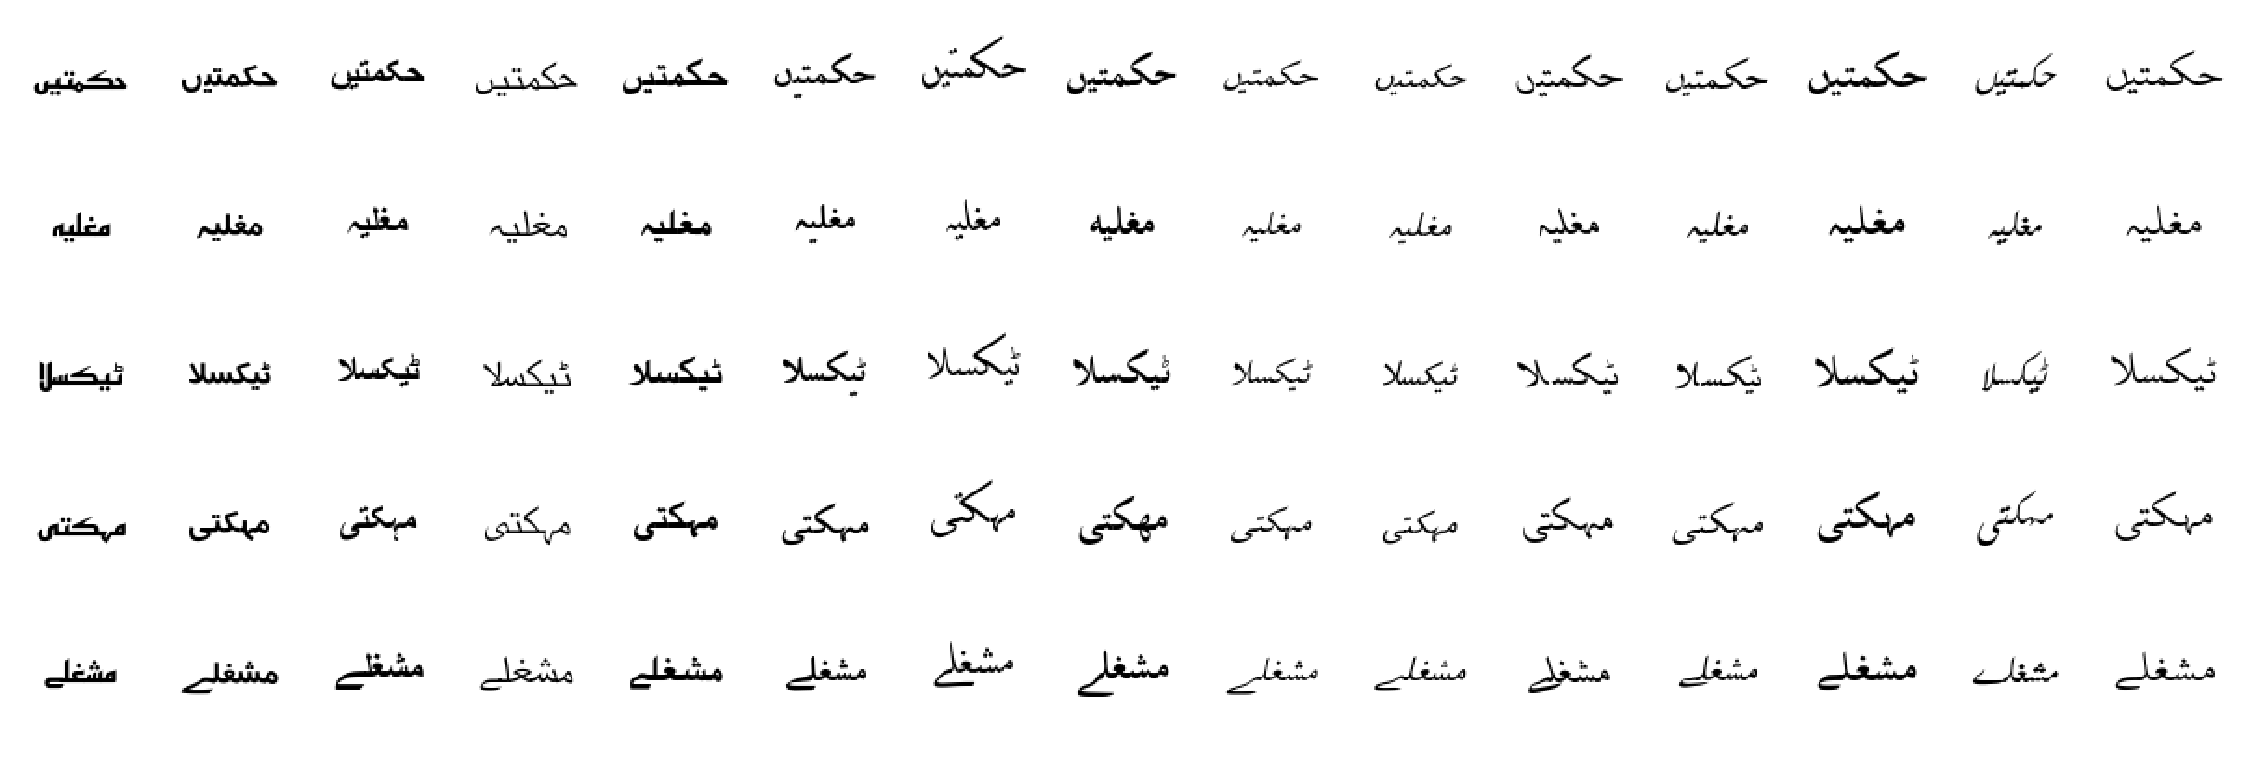

In [5]:
num_cols = 15
num_rows = 5
size = (80,80)

full_image = np.ones((size[0]*num_rows, size[1]*num_cols))
idx = 0

indexes = list(range(200))
np.random.shuffle(indexes)
    
for r in range(num_rows):
    for c in range(num_cols):
        full_image[r*size[0] : (r+1) * size[1], c*size[1] : (c+1) * size[1]] = get_class_image("../../../Datasets/Qaida/images/train/", classes[r], indexes[c])

plt.figure(figsize=(40,20))
plt.imshow(full_image, cmap="gray")
plt.axis("off")
plt.show()

In [6]:
plt.imsave("../doc/img/sprite.png", full_image, cmap="gray")

### Test train distribution

In [11]:
def get_mean_image(img_list):
    img = io.imread(img_list[0], 'L')
    im_array = np.ones((len(img_list), *img.shape), dtype=img.dtype)
    for idx, im in enumerate(img_list):
        im_array[idx] = io.imread(im, 'L')
    return np.mean(im_array, axis = 0)
    

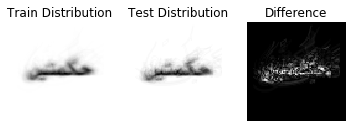

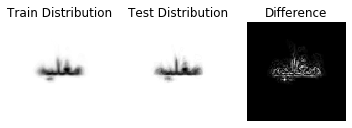

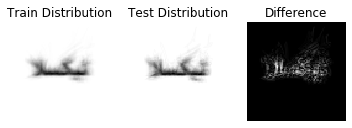

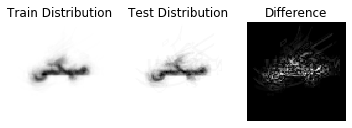

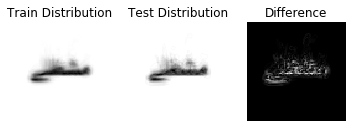

In [17]:
# selected_classes = np.random.choice(range(2000), size=10, replace=False)
selected_classes = [17559, 16729, 17026, 16497, 15649]

for cls in selected_classes:
    train_images = get_class_image_list("../../../Datasets/Qaida/images/train/", cls)
    train_mi = get_mean_image(train_images)
    
    test_images = get_class_image_list("../../../Datasets/Qaida/images/test/", cls)
    test_mi = get_mean_image(test_images)
    
    diff_mi = np.abs(train_mi - test_mi)
    
    plt.subplot(131)
    plt.title("Train Distribution")
    plt.imshow(train_mi, cmap='gray')
    plt.axis('off')
    
    plt.subplot(132)
    plt.title("Test Distribution")
    plt.imshow(test_mi, cmap='gray')
    plt.axis('off')
    
    plt.subplot(133)
    plt.title("Difference")
    plt.imshow(diff_mi, cmap='gray')
    plt.axis('off')
    
    plt.show()

### Display ligatures

In [ ]:
import codecs

import codecs
with codecs.open('../data/ligatures_map', encoding='UTF-16LE') as ligature_file:
    ligatures_map = ligature_file.readlines()

for class_idx in range(len(ligatures_map)):
    ligature = ligatures_map[class_idx]
    print(class_idx, ligature)